# Experimental data

<img src="https://upload.wikimedia.org/wikipedia/commons/6/6f/Pendulum-no-text.gif" alt="Pendulum" ALIGN="right" style="width: 300px;"/>

### Aim:
To visualise data obtained from a pendulum experiment, and extract useful information from a messy data file. \
*No physics knowledge required.*

### Data file requirements:
*Double pendulum.txt* \
*Modulated signal.csv*

### Non-anaconda python libaries:
None

### Prerequisites:
* Basics
* Plotting

### Primary Outcomes:
* Converting messy input files to a clean pandas dataframe.

### Secondary Outcomes:
* Importing data from text files
* Manipulating Pandas dataframes

## Background:
So you have just done a experiment measuring the angle of a pendulum using a data logger. \
Now you want to read (import) that data into python to give it a look and analyse it.

Since its data from a pendulum we expect get a time vs angle graph that looks like a sin function similar to below.

<img src="PendulumData.png" alt="Pendulum plot" ALIGN="centre" style="width: 400px;"/>

# Importing the data

In [1]:
#First we import a few packages we will need 
import numpy as np               # for dealing with math
import pandas as pd              # for tables
import matplotlib.pyplot as plt  # for plotting
%matplotlib inline

The data we want to import is called \
Double pendulum.txt \
It must be placed in the same directory as this notebook for the code below to work as expected.

The text file contains data from a pendulum experiment. \
It has three columns one for time, two for voltage. Each voltage is directly related to the angle of one pendulum. \
In this dataset two pendula were being mesured simultaniously.

The first row (Header) of the file contains the descriptions of the data beneith it in that column. The second row contains the units for each of the values (s = seconds, V = Volts)

Below is an image of the text file, however it is highly encoraged for you to open it yourself with a text editor such as notepad.
![Text file image](textfileimage.png "Text file image")

We will be using Pandas to deal with our data tables. Pandas has a function called read_csv that can be used to read a variety of files (find more info in the documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html))

Note, a CSV stands for Comma Seperated Values file.

In [58]:
dataTable = pd.read_csv('Double pendulum.txt') 
# Here we use the read_csv funtion to read in our file, but we do not include any of the optional arguments

In [59]:
dataTable 
#In Jupyter notebook simply writing the name of the object you are intrest in will typically print it to screen

,Time\tUI (ID 01) / Voltage U\tUI (ID 03) / Voltage U
0,t/s\tU/V\tU/V
1,0.00\t-0.37\t-0.15
2,0.00\t-0.37\t-0.14
3,0.00\t-0.37\t-0.15
4,0.00\t-0.37\t-0.14
...,...
179196,89.60\t0.06\t-0.08
179197,89.60\t0.07\t-0.06
179198,89.60\t0.07\t-0.05
179199,89.60\t0.06\t-0.05


Hmmm, our data doesn't look like it was imported right. There are only two columns, one is just couting the rows and the other has all the data squashed together with \t everywhere.

This is because our data is actually saved as a diffrent format a "TSV" Tab Spaced Values format. This can still be read by pd.read_csv but we will need to tell the function to use a tab "\t" as a seperator instead of the default it is expecting which is a comma ",".

If you are think, how could I have been expected to figure that out? This information can be found in the documentation for the [function](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). But what is more likely is you could have googled the problem and found a solution on stack overflow or some other code related message board, it is recomended you get used to this as this is how anyone learning code figures things out.

In [60]:
dataTable = pd.read_csv('Double pendulum.txt',sep='\t') # Adding a separation 
dataTable # printing the table

,Time,UI (ID 01) / Voltage U,UI (ID 03) / Voltage U
0,t/s,U/V,U/V
1,0.00,-0.01,-0.03
2,0.00,-0.01,-0.02
3,0.00,-0.01,-0.02
4,0.00,-0.03,-0.02
...,...,...,...
120696,60.35,-0.25,-0.26
120697,60.35,-0.25,-0.26
120698,60.35,-0.25,-0.26
120699,60.35,-0.25,-0.26


That looks better but it would be nice if we got rid of the first row which isn't actually data. This can be done by telling read_csv what row the header (additional information found in data files that are not the actual data) starts at. 

In [70]:
dataTable = pd.read_csv('Double pendulum2.txt',sep='\t',header=1) # Setting what row to read as our heading
dataTable # printing the table

,t/s,U/V,U/V.1
0,0.00,-0.13,-0.12
1,0.00,-0.13,-0.12
2,0.00,-0.12,-0.11
3,0.00,-0.12,-0.12
4,0.00,-0.12,-0.11
...,...,...,...
239295,119.65,-0.21,-0.20
239296,119.65,-0.21,-0.20
239297,119.65,-0.21,-0.18
239298,119.65,-0.21,-0.20


Great, now our table is usable, but one more refinement is worth it, lets rename our columns so that they are easily accessable.

In [71]:
dataTable.columns = ["time", "voltage", "voltage1"] # renaming columns headings
dataTable # printing the table

,time,voltage,voltage1
0,0.00,-0.13,-0.12
1,0.00,-0.13,-0.12
2,0.00,-0.12,-0.11
3,0.00,-0.12,-0.12
4,0.00,-0.12,-0.11
...,...,...,...
239295,119.65,-0.21,-0.20
239296,119.65,-0.21,-0.20
239297,119.65,-0.21,-0.18
239298,119.65,-0.21,-0.20


Much better, for the sake of this notebook we do not care about the second pendulum's values so lets drop unneded the column voltage1.\
This can be done a variety of ways but the simplest is by making a subtable excluding the columns you dont care about.

In [72]:
# Saving the new smaller table that does not include voltage1 to the name "smallerTable"
smallerTable = dataTable[["time", "voltage"]]
smallerTable

,time,voltage
0,0.00,-0.13
1,0.00,-0.13
2,0.00,-0.12
3,0.00,-0.12
4,0.00,-0.12
...,...,...
239295,119.65,-0.21
239296,119.65,-0.21
239297,119.65,-0.21
239298,119.65,-0.21


If we are satisfied with our formatting we can also overwrite our old dataTable with the new smallerTable.

In [73]:
dataTable = smallerTable
dataTable

,time,voltage
0,0.00,-0.13
1,0.00,-0.13
2,0.00,-0.12
3,0.00,-0.12
4,0.00,-0.12
...,...,...
239295,119.65,-0.21
239296,119.65,-0.21
239297,119.65,-0.21
239298,119.65,-0.21


## Cleaning the data

Now that our data is imported correctly, lets have a look at it. We will use matplotlib's plt.plot function for a quick and dirty plot.
Note that you can refrence a single column of the dataframe by using the DataFrame.ColumnName convention this produces a pandas series which is similar to a numpy array.

In [74]:
type(dataTable.time) #showing the type of a single column

pandas.core.series.Series

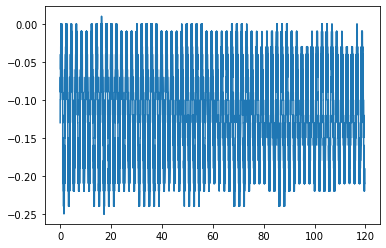

In [75]:
# A quick and dirty plot of our data
plt.plot(dataTable.time,dataTable.voltage)

This plot looks a bit odd, it doens't look anywhere as smooth as it should. Let us see what's going on in more detail by making it plot individual data points.

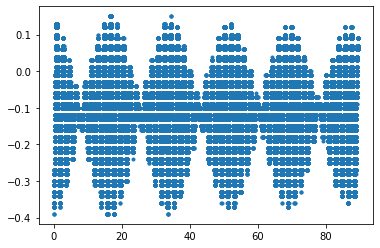

In [67]:
plt.plot(dataTable.time,dataTable.voltage,'.') #another look using dots instead of lines

This looks very strange we should see a smooth distribution of points, not this discrete mess. Let's zoom in and look closer.

To zoom in a simple way to do it is by only plotting a subset of the data.
To select a subset of a pandas series (same as a single column of a dataFrame) you can use the slicing operation similar to a numpy array


In [68]:
dataTable.time[0:100] # this would show the first 100 values of the time series

0     0.00
1     0.00
2     0.00
3     0.00
4     0.00
      ... 
95    0.05
96    0.05
97    0.05
98    0.05
99    0.05
Name: time, Length: 100, dtype: float64

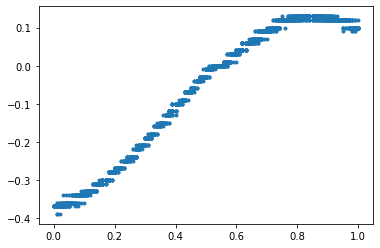

In [69]:
# Let's look at a subsection of the data
start = 0
end = 2000
plt.plot(dataTable.time[start:end],dataTable.voltage[start:end],'.')

It looks like our experimental data is lumped around specific voltage steps. This was likely caused by the datalogger not recording the voltage to enough decimal places. Additionally each time does not have a single unique voltage, this can be seen by looking at our raw data, every 20 rows are sharing the same time. This means it should have exported the time as 4dp but was instead 2dp (and similarly for voltage), while annoying this can still be fixed.

In [14]:
dataTable.time[0:51]

0     0.00
1     0.00
2     0.00
3     0.00
4     0.00
5     0.00
6     0.00
7     0.00
8     0.00
9     0.00
10    0.00
11    0.01
12    0.01
13    0.01
14    0.01
15    0.01
16    0.01
17    0.01
18    0.01
19    0.01
20    0.01
21    0.01
22    0.01
23    0.01
24    0.01
25    0.01
26    0.01
27    0.01
28    0.01
29    0.01
30    0.01
31    0.02
32    0.02
33    0.02
34    0.02
35    0.02
36    0.02
37    0.02
38    0.02
39    0.02
40    0.02
41    0.02
42    0.02
43    0.02
44    0.02
45    0.02
46    0.02
47    0.02
48    0.02
49    0.02
50    0.03
Name: time, dtype: float64

One way of fixing this (but not nessesarily the best) is by making each time value have a unique voltage by taking an average voltage for each time.
To figure out how to do this one might search something like "pandas merge values if column is same", remember google doesn't care about proper grammer.

This turns up this [page](https://stackoverflow.com/questions/46826773/how-can-i-merge-rows-by-same-value-in-a-column-in-pandas-with-aggregation-func)

Which brings to our attention the aggregate and groupby functions. From here we could look them up in the pandas documentaion. OR we could insted try our luck by using the example as a base.

This is the code provided in the page:

```
aggregation_functions = {'price': 'sum', 'amount': 'sum', 'name': 'first'}
df_new = df.groupby(df['id']).aggregate(aggregation_functions)
```

Lets change it to suit our data.

In [15]:
fixedTable = dataTable.groupby(dataTable['time']).aggregate({'voltage':'mean'})
fixedTable

,voltage
time,
0.00,-0.010909
0.01,-0.009000
0.02,-0.005789
0.03,-0.002500
0.04,-0.002000
...,...
60.31,-0.245238
60.32,-0.244737
60.33,-0.246667


That kind of worked but our time column became our index column. By looking at the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) we find that there is a as_index argument that will fix our issue.

In [16]:
fixedTable = dataTable.groupby(dataTable['time'],as_index=False).aggregate({'voltage':'mean'}) 
# We don't want to use time as an index
fixedTable

,time,voltage
0,0.00,-0.010909
1,0.01,-0.009000
2,0.02,-0.005789
3,0.03,-0.002500
4,0.04,-0.002000
...,...,...
6031,60.31,-0.245238
6032,60.32,-0.244737
6033,60.33,-0.246667
6034,60.34,-0.244211


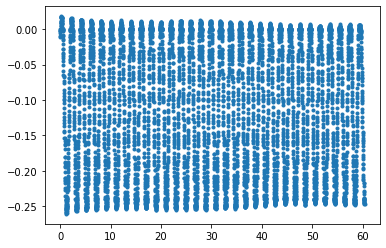

In [17]:
plt.plot(fixedTable.time,fixedTable.voltage,'.')

That looks much more continuous than before. Now we can see another issue, our data is not centered around 0 volts as it should be. We can fix that by finding the mean value of the entire dataset and subtracting that from every point in the dataset.

In [18]:
fixedTable.voltage.mean() #This is how you get the mean of a Series

-0.11305036955679153

In [19]:
fixedTable.voltage = fixedTable.voltage - fixedTable.voltage.mean() # Subtracting the zero offset from all voltages then reasigning the voltages
fixedTable

,time,voltage
0,0.00,0.102141
1,0.01,0.104050
2,0.02,0.107261
3,0.03,0.110550
4,0.04,0.111050
...,...,...
6031,60.31,-0.132188
6032,60.32,-0.131686
6033,60.33,-0.133616
6034,60.34,-0.131160


Let us check the plot once more to see if it is now centered around zero.

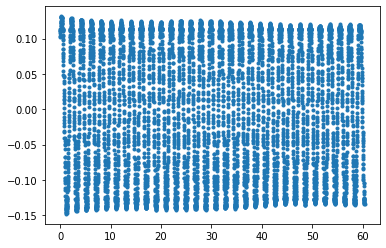

In [20]:
plt.plot(fixedTable.time,fixedTable.voltage,'.')

Looking good, finally lets double check that section we looked at earlier that was very discrete

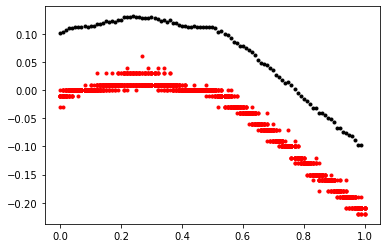

In [21]:
# viewing the same section from earlier
start = 0
end = 2000 

# Beacuse of the averageing we merged 20 data point into one, so to compare we need to divide our end point by 20
plt.plot(fixedTable.time[start:end//20],fixedTable.voltage[start:end//20],'k.') 
# the // operation means divide and round down, it is useful when the output variable needs to be an integer

plt.plot(dataTable.time[start:end],dataTable.voltage[start:end],'r.')

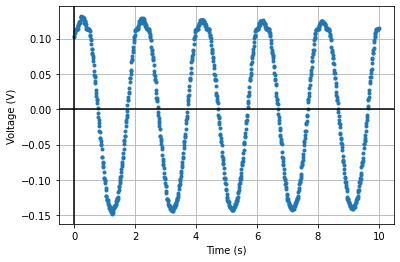

In [22]:
end = 1000
plt.plot(fixedTable.time[:end],fixedTable.voltage[:end],'.')
plt.grid() # Turning on the grid
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.axhline(0,color='k') # adding a black horizontal line at V=0
plt.axvline(0,color='k') # adding a black vertical line at t=0

Now that our data has been cleaned up we can export it back into a file using pandas .to_csv funtion. This time we will explicity say how many decimal places to export the data to using the float_format argument.

In [23]:
fixedTable.to_csv("clean_pendulum_data.txt",sep=',',float_format='%.6f') # exporting to 6dp

# Summary

Through out this notebook we learnt to:
* Import data into a pandas dataframe
* Identify issues in our data
* Modify our data to fix any issues
* Export our data out of python to a file


(optional) There are also two other pendulum files, *Double pendulum2.txt* and *Double pendulum3.txt*, that have different data but in an identical format to before if you would like to see the same process again with new data.

# Test your understanding
Now it is your turn. Try to import the file "Modulated signal.csv" and clean up the data. This time you are expecting a sin wave that has been frequency modulated.

Frequency modulation is when a sin wave is modified to carry information by changing the frequency of different parts of the signal. This is how FM (Frequency Modulated) radio works. You can picture it like compressing and streching a slinky.

You do not need to understand the theory, you just need a general idea of what the data should look like once cleaned.

<img src="https://www.physics-and-radio-electronics.com/blog/wp-content/uploads/2018/04/frequencymodulation.png" alt="Frequency modulation" ALIGN="centre" style="width: 500px;"/>

Import the data  
<br>
<details>
    <summary><strong>Click this text once to reveal a level 1 hint</strong></summary>
    Make sure to open the data file in a text editor first to see if it has headers and what seperator it uses.
</details>

Visualise the data to see if anything is odd.  
<br>
<details>
    <summary><strong>Click this text once to reveal a level 1 hint</strong></summary>
    It might help to zoom in to the data to see what is happening.
</details>
<br>
<details>
    <summary><strong>Click this text once to reveal a level 2 hint</strong></summary>
    Is there a unique time for every data point?
</details>

How can we fix our problem?  
<br>
<details>
    <summary><strong>Click this text once to reveal a level 1 hint</strong></summary>
    The issue is the time column was exported with 5 decimal places even though it should have been 6 decimal places. The signal data seems fine though. How can we fix this?
</details>
<br>
<details>
    <summary><strong>Click this text once to reveal a level 2 hint</strong></summary>
    Averaging like last time will not work, too much data will be lost. Instead we need to reconstruct a new time column with the correct 6dp spacing.
</details>
<br>
<details>
    <summary><strong>Click this text once to reveal a level 3 hint</strong></summary>
    Reconstructing the time column can be done by making a numpy array using numpy.linspace() then copying that on to our time column.
</details>

Now let's plot it and see if it worked.

In [76]:
dataTable.voltage

0        -0.13
1        -0.13
2        -0.12
3        -0.12
4        -0.12
          ... 
239295   -0.21
239296   -0.21
239297   -0.21
239298   -0.21
239299   -0.21
Name: voltage, Length: 239300, dtype: float64

In [84]:
dataTable.voltage = dataTable.voltage*100

In [85]:
dataTable.voltage

0        -13000.0
1        -13000.0
2        -12000.0
3        -12000.0
4        -12000.0
           ...   
239295   -21000.0
239296   -21000.0
239297   -21000.0
239298   -21000.0
239299   -21000.0
Name: voltage, Length: 239300, dtype: float64